# CASO PRÁCTICO 3 - MAXIMIZACIÓN DE BENEFECIOS MEDIANTE EL MUESTREO DE THOMPSON

Absolute performance: 100400.00 €
Relative performance: 107.15 %


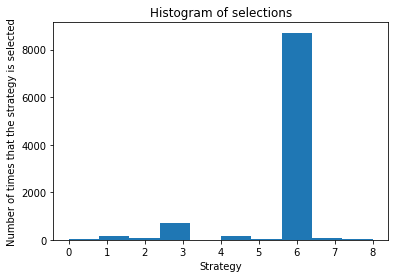

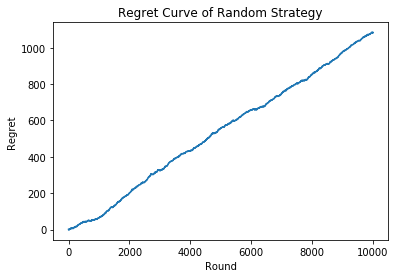

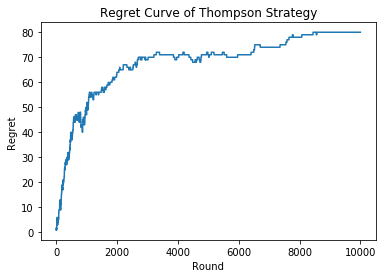

In [20]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import random

#Parameters configuration
N = 10000 #number of clients
d = 9 #number of marketing campaigns

#Creating the simulation
conversion_rates = [0.05, 0.13, 0.09, 0.16, 0.11, 0.04, 0.20, 0.08, 0.01]
X = np.array(np.zeros([N, d]))
for i in range(N):
    for j in range(d):
        if np.random.rand() <= conversion_rates[j]:
            X[i,j] = 1

#OPEN SELECTION AND THOMPSON SAMPLING IMPLEMENTATION
strategies_selected_rs = [] #random samplig
strategies_selected_ts = [] #thompson sampling
total_reward_rs = 0
total_reward_ts = 0
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
rewards_strategies_aleatory = [0] * d
rewards_strategies_thompson = [0] * d
regret_aleatory = []
regret_thompson = []

for n in range(0, N):
    #Aleatory selection
    strategy_rs = random.randrange(d)
    strategies_selected_rs.append(strategy_rs)
    reward_rs = X[n, strategy_rs]
    total_reward_rs += reward_rs
    # Best Strategy
    for i in range(0, d):
        rewards_strategies_aleatory[i] = rewards_strategies_aleatory[i] + X[n, i]
    total_reward_bs = max(rewards_strategies_aleatory)
    # Regret
    regret_aleatory.append(total_reward_bs - total_reward_rs)
    #Thompson sampling
    strategy_ts = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            strategy_ts = i
    reward_ts = X[n, strategy_ts]
    if reward_ts == 1:
        number_of_rewards_1[strategy_ts] += 1
    else:
        number_of_rewards_0[strategy_ts] += 1
    strategies_selected_ts.append(strategy_ts)
    total_reward_ts += reward_ts
    # Best Strategy
    for i in range(0, d):
        rewards_strategies_thompson[i] = rewards_strategies_thompson[i] + X[n, i]
    total_reward_bs = max(rewards_strategies_thompson)
    # Regret
    regret_thompson.append(total_reward_bs - total_reward_ts)
#Calculate absolut and relative return
absolute_return = (total_reward_ts - total_reward_rs) * 100 #supose that the price of product is 100 €
relative_return = ((total_reward_ts - total_reward_rs) / total_reward_rs) * 100 

print('Absolute performance: {:.2f} €'.format(absolute_return))
print('Relative performance: {:.2f} %'.format(relative_return))

#Histogram of selections representation

plt.hist(strategies_selected_ts)
plt.title('Histogram of selections')
plt.xlabel('Strategy')
plt.ylabel('Number of times that the strategy is selected')
plt.show()

# Plotting the Regret random Curve
plt.plot(regret_aleatory)
plt.title('Regret Curve of Random Strategy')
plt.xlabel('Round')
plt.ylabel('Regret')
plt.show()

# Plotting the Regret thompson Curve
plt.plot(regret_thompson)
plt.title('Regret Curve of Thompson Strategy')
plt.xlabel('Round')
plt.ylabel('Regret')
plt.show()
